# **Mall Customers Dataset**
## Customer Segmentation

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor
from sklearn.cluster import KMeans



In [142]:
data = pd.read_csv('Mall_Customers.csv')
data = pd.DataFrame(data)
df = data.copy()
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Remove space and rename columns**

In [144]:
# Remove Spaces
df.columns = df.columns.str.replace(' ', '')

# Rename some column names
df = df.rename(columns={"Genre":"Gender", "AnnualIncome(k$)": "IncomeAnnual", "SpendingScore(1-100)":"SpendingScore"})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'IncomeAnnual', 'SpendingScore'], dtype='object')

In [145]:
# Convert annual income into thousands
df.IncomeAnnual = df.IncomeAnnual * 1000
df.IncomeAnnual

0       15000
1       15000
2       16000
3       16000
4       17000
        ...  
195    120000
196    126000
197    126000
198    137000
199    137000
Name: IncomeAnnual, Length: 200, dtype: int64

**Identify Missing Values if Any**

In [146]:
# Identify Missing Values if Any
df.isnull().sum().sort_values(ascending=False)

CustomerID       0
Gender           0
Age              0
IncomeAnnual     0
SpendingScore    0
dtype: int64

**Summary Statistics**

In [147]:
df.describe()

,CustomerID,Age,IncomeAnnual,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60560.000000,50.200000
std,57.879185,13.969007,26264.721165,25.823522
min,1.000000,18.000000,15000.000000,1.000000
25%,50.750000,28.750000,41500.000000,34.750000
50%,100.500000,36.000000,61500.000000,50.000000
75%,150.250000,49.000000,78000.000000,73.000000
max,200.000000,70.000000,137000.000000,99.000000


**Gender Distribution**

A bar plot and pie chart to show the gender distribution in the dataset

In [148]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

**Customer Gender Visualization**

In [149]:
sns.set_theme(style="ticks", color_codes=True)

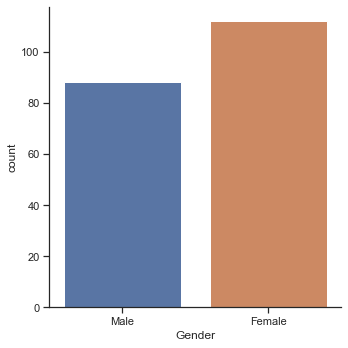

In [150]:
sns.catplot(x="Gender", kind="count", data=df)


Text(0.5, 1.0, 'Ratio of male and female distribution')

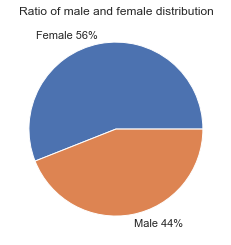

In [151]:
df_to_pie = df.groupby('Gender')['Gender'].count()

fem_ratio = floor((df_to_pie.Female / df_to_pie.sum()) *100)
male_ratio = 100 - fem_ratio
plt.pie(x=df_to_pie, labels=['Female '+str(fem_ratio)+"%", 'Male '+str(male_ratio)+"%"])
plt.title("Ratio of male and female distribution")

**Age Distribution**

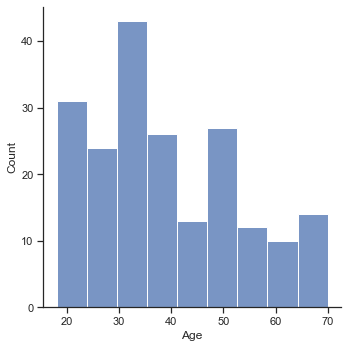

In [152]:
sns.displot(df.Age)

**Annual Income Analysis**

In [153]:
df.IncomeAnnual.describe()

count       200.000000
mean      60560.000000
std       26264.721165
min       15000.000000
25%       41500.000000
50%       61500.000000
75%       78000.000000
max      137000.000000
Name: IncomeAnnual, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

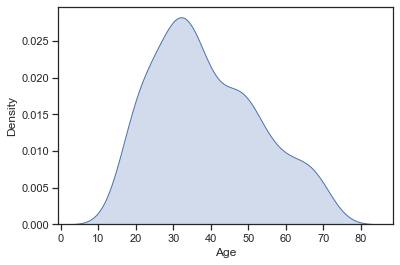

In [154]:
sns.kdeplot(data=df.Age, fill=True)


**Analyzing Spending Score**

In [155]:
df.SpendingScore.describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: SpendingScore, dtype: float64

<AxesSubplot:xlabel='SpendingScore'>

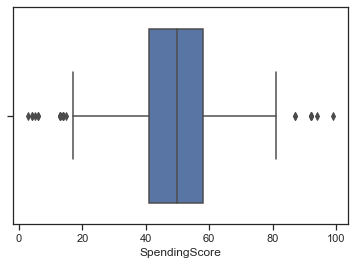

In [156]:
sns.boxplot(data=df.SpendingScore, x=df.SpendingScore)

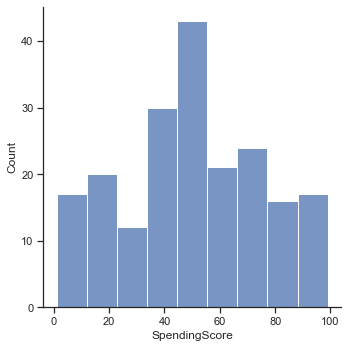

In [157]:
sns.displot(df.SpendingScore)

**KMeans Clustering**

In [158]:
# drop customer ID column
df_kmeans = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)

df_kmeans.describe()

,IncomeAnnual,SpendingScore
count,200.000000,200.000000
mean,60560.000000,50.200000
std,26264.721165,25.823522
min,15000.000000,1.000000
25%,41500.000000,34.750000
50%,61500.000000,50.000000
75%,78000.000000,73.000000
max,137000.000000,99.000000


Due to substantial variation in magnitude of data between Age, Annual Income and Spending Score, the data wll be scaled to the same magnitude

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_kmeans)


# Statistics of scaled data

pd.DataFrame(data_scaled).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


**Kmeans Function**

In [160]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the kmeans algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [161]:
# inertia on the fitted data
kmeans.inertia_

157.70400815035939

**Plot Elbow curve to find optimal number of clusters**

Text(0, 0.5, 'Inertia')

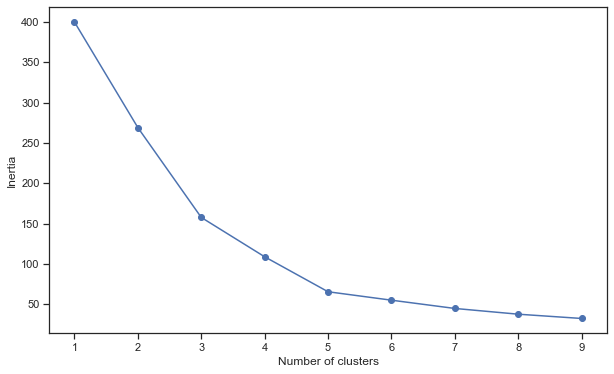

In [162]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(10,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Optimal cluster value is 5

In [163]:
# kmeans using 5 clusters and kmeans++ initialization
kmeans = KMeans(n_init = 10, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
clusters = kmeans.predict(data_scaled)

In [164]:
df_cluster = df
df_cluster['clusters'] = clusters


In [165]:
df_cluster.head()

,CustomerID,Gender,Age,IncomeAnnual,SpendingScore,clusters
0,1,Male,19,15000,39,4
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,4
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,4


Text(0, 0.5, 'Spending Score')

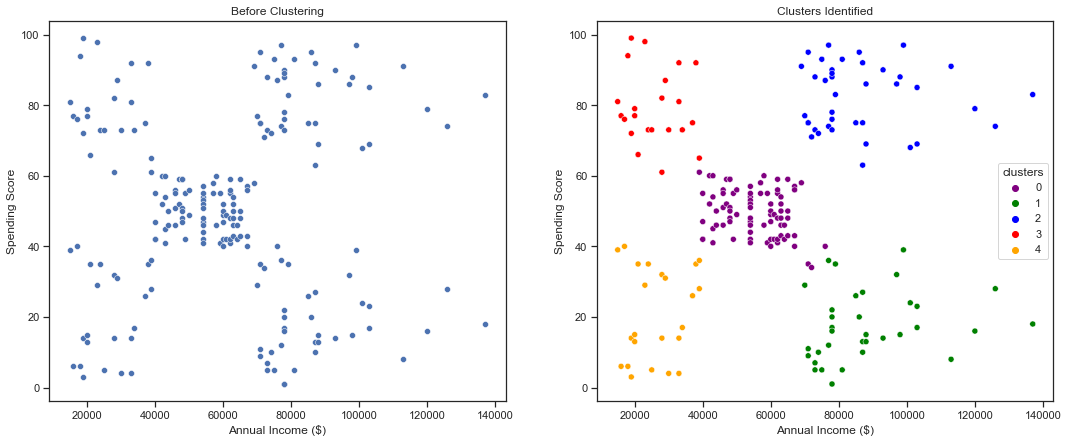

In [168]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)
sns.scatterplot(ax=ax1, x='IncomeAnnual' , y = 'SpendingScore', data=df)
sns.scatterplot(ax=ax2, x='IncomeAnnual', y='SpendingScore', 
                data=df_cluster, hue='clusters', palette=['purple', 'green', 'blue', 'red', 'orange'])
ax1.set_title("Before Clustering")
ax1.set_xlabel("Annual Income ($)")
ax1.set_ylabel("Spending Score")

ax2.set_title("Clusters Identified")
ax2.set_xlabel("Annual Income ($)")
ax2.set_ylabel("Spending Score")